# COMP1008 2024/25 Coursework - Wine Quality Prediction with Machine Learning

#### **Student Name**: Gabriel Bridger
#### **Student ID**: 2086810 

## Task description

**Main Task**: Utilizing the provided Red Wine Quality dataset, build a Linear Regression Model and another Machine Learning Model of your choice to predict wine quality. Employ appropriate methods from the `pandas`, `matplotlib`, and `sklearn` libraries to analyze and process the dataset for building predictive models.



**Format**: Use this Jupyter Notebook as a template to write your report in `Markdown` cells, supported by your source code in Code cells. Ensure your code produces the corresponding plots or results addressing the questions. Rename this .ipynb file to `202425_COMP1008_cw_XXX.ipynb`, where XXX is your username (e.g., psxyz), and submit it to Moodle by <b><font color = "red">24 March, 3pm</font></b>.

**Marks**: The coursework is worth a total of 100 marks (accounting for 25% of the COMP1008 module grade). Marks will be awarded based on your understanding of machine learning theories, the informativeness and presentation of your code, visualizations, results (e.g., code comments, necessary labels in plots), self-learning ability in solving the specific problem, as well as, how succinct, concise, and clear is your report writing.

Please check the detailed instructions at the end of this template file.

<div class="alert alert-success" style="text-align:left;">
<h2>Question 1. Prediction Model 1 - Linear Regression Model<span style="float:right;">[50 marks]</span></h2></div>

#### Question 1a <span style="color:red">(5 marks)</span> 
**TASK**: Briefly explain why the Red Wine Quality dataset is suitable for linear regression analysis.
- Identify at least 3 characteristics that make this dataset appropriate for regression.
- Use 3 bullet points (one for each characteristics) to present your answer concisely.
- Your explanation should reflect your understanding of the linear regression model.

<b>Q1a Answer</b>: Your answer here

**Continuous Numerical Values**    
The data set has continuous numerical values which allows values to be plotted and analysed to create an equation for the line generated from linear regression techniques. This makes it appropriate because linear regression essentially constructs a line with a linear equation to try and plot a relationship between some given attributes, so the more points and the wider range of points that the algorithm is given the more accurately it will be able to generate a line representing the relationship between the given inputs and the selected output

**Clear Target Values**    
By having a clear target value - 'quality' attribute - it means that the system will be able to calculate a 'loss' value to see how good the generated equation is at predecting the relationship between the set of inputs and the output which means that the algorithm can look at the current loss and previous loss to see if it has decreased and if it has then the algorithm knows for the next iteration aswell to shift the regression line further in that direction so that it isn't blindly guessing which way will improve the accuracy of the predicted relationship.   

**Likely Linear Relation**
Lots of the potential input attributes within the dataset are likely to be linearly related meaning there likely exists a linear equation that can plot the overall relationship between the inputs of the wine data set and the outputs. So a linear regression model will be able to pretty accurately predict the relationship aswell as its aim is to try and establish the linear relationship between attributes

---

#### Question 1b <span style="color:red">(15 marks)</span>

**TASK**: Analyze the dataset using appropriate methods from the `pandas` and/or `matplotlib` libraries. 
- Identify potential issues with the current dataset, specify which part(s) of the dataset are affected. Explain what could go wrong if the data is not properly pre-processed.
- Provide at least 2 short-code solutions demonstrating how you analyze these issues.  
- Briefly explain how each code snippet helps evaluate data quality issues.


<b>Q1b answer</b>: Your answer here

### Potential Issues Within the Current Dataset
**NaN Values**

`Not A Number` values exist within the data set such as within the `density` or the `free sulfur dioxide` attribute.

If pre-processing isn't applied to remove the `NaN` values from the dataset then this could break the model because if an input is `Not a Number` then the formula (equation of the regression line) cannot be used to predicted the output value of an input which would cause the program to crash.1


**Outliers Within the Dataset**

Some values within the dataset have extreme values/outliers - such as in the `chlorides` or `sulphates` columns - which can make it harder for the algorithm to develop a linear regression line for the dataset, so these values will need to be identified and then removed from the data set to avoid harming the model.

If pre-processing isn't properly applied then the outliers can skew the predicted relationship between the inputs and the outputs resulting in inaccurate predictions for a given set of inputs.


**Not Normally Distributed**

Some of the data for attributes such as `residual sugar` have skewed data distributions and linear regression generally assumes that data is normally distributed across the dataset.

If pre-processing isn't properly applied then the model may be more sensitive to the outliers/extreme values present in some columns as it will try to create a linear relationship that can satisfy both extreme and normal values therefore the regression line will end up somewhere in between the extreme and normal values therefore it's predictions could be inaccurate.


**Duplicate Values**

If any duplicate rows exist within the dataframe this could become an issue when the algorithm begins to try and map the linear relationship between the inputs and the outputs. This is because by having duplicate rows the system may become bias towards the over duplicates as they appear more often so the algorithm then believes they should be more common, however in reality they may not be. Another issue that arises from having duplicate values is that the model can **overfit** to that specific data entry meaning that the performance metrics - such as `loss` - may be over inflated because for the test data the regression line would be very good at predicting a single combination of inputs' output values however on unseen data it may not perform as well due to over-representation of a single row within the dataset. 

In [75]:
import pandas as pd
wineQualDf = pd.read_csv('winequality-red.csv')

# run to set up the data frame to be pre-processed

**Counting NaN Values**

The `countNaNRows()` takes in the data frame to be analysed and then uses the `df.isna()` function to create a dataframe of booleans identifiying whether the value at the corresponding location is a `NaN` value or not. Then the `.any(axis=1)` function is applied which conceptually flattens a dataframe into a list by looking at a row - determined by axis = 0 for columns or axis = 1 for rows - of a given index within the dataframe and then if any of the values in that row are `True` then the corresponding index in the created list will be `True` aswell, otherwise the corresponding index is set to `False`. This then means that the `.sum()` function can be applied as it is now operating on a list/array which takes `True = 1` and `False = 0` so by totalling the list it gives us the number of rows that contain `NaN` values.

In [76]:
def countNaNRows(df):
    NaNCount = df.isna().any(axis=1).sum()
    return NaNCount


countNaNRows(wineQualDf)

np.int64(275)

**Counting Outliers**

When removing outliers, once abstracted, the larger problem isn't removing the values from the dataframe but identifying and establishing what constitutes an outlier.

In the code snippet above an outlier is identified as a value that is either:
- *greater than the third quartile of the dataset plus 3 × the interquartile range*
- *less than the first quartile of the dataset minus 3 × the interquartile range*

The function `countOutlierRows` counts the number of rows that would be removed due to containing values that would be classified as 'outliers' by the program, this is done by first getting the quantiles of the passed in dataframe and then calculates the interquartile range. Next it generates a boolean mask with values that meet either condition specified. It then calls the `.sum()` function to finally count the number of rows that would be removed from the data frame due to containing values that constitute outliers.

In [77]:
def countOutlierRows(df) -> pd.DataFrame:
    quart1 = df.quantile(0.25)
    quart3 = df.quantile(0.75)

    IQrange = quart3 - quart1

    lowerBound = quart1-3*IQrange
    upperBound = quart3+3*IQrange

    outlierCount = ((df<lowerBound) | (df>upperBound)).any(axis=1).sum()

    return outlierCount


countOutlierRows(wineQualDf)

np.int64(169)

**Counting the Number of Duplicate Rows**

The function below - `countDuplicateRows` - counts the number of occurences of duplicate rows within the dataframe, this is done by using the inbuilt `.duplicated()` function that evaluates every row within a data frame to see if there has been an occurence of the same row before. This then returns a `series` that similarly to the `.any()` function has each element either evaluate to either `True` or `False` which - then again - can have the `.sum()` function applied to it which then essentially counts the number of occurences of `True` values which represnets the number of rows that are duplicated.

So for example in the dataframe:
    *'A': [1, 2, 3, 1, 2],*
    *'B': ['a', 'b', 'c', 'a', 'b']*

the output of the `countDuplicateRows()` would be 2 because there are 2 occurences of data duplication within the dataframe - `Row 4` is a duplicate of `Row 1` (1,a) and then `Row 5` is a copy of `Row 2`. 

In [78]:
def countDuplicateRows(df):
    dupeCount = df.duplicated().sum()
    return dupeCount

countDuplicateRows(wineQualDf)

np.int64(2)

---

#### Question 1c <span style="color:red">(20 marks)</span>
**TASK**: Apply appropriate data preprocessing techniques to address the issues identified in Question 1b.
- Provide a code solution that resolves the identified data issue(s).
- Briefly explain the methods and parameters used in your solution. Ensure your explanation clearly justifies how these techniques improve data quality and suitability for analysis.


<b>Q1c answer</b>: 

In [79]:
import pandas as pd
wineQualDf = pd.read_csv('winequality-red.csv')


class NaNhandling():
    @staticmethod
    def handleNaNmodal(df):
        correctedDf = df.apply(lambda x: x.fillna(x.mode()[0],axis=0))
        return correctedDf
    

    @staticmethod
    def handleNaNdrop(df):
        return df.dropna()
    
    @staticmethod
    def handleNaNValues(df):
        handleMethod = 'drop'
        
        if countNaNRows(df) == 0:
            return df
        
        if handleMethod == 'modal':
            return NaNhandling.handleNaNmodal(df)

        elif handleMethod == 'drop':
            return NaNhandling.handleNaNdrop(df)
        

class outlierHandling():
    @staticmethod
    def getUpperLowerBounds(df):
        rangeCoeff = 3
        
        quart1 = df.quantile(0.25)
        quart3 = df.quantile(0.75)

        IQrange = quart3 - quart1

        lowerBound = quart1-rangeCoeff*IQrange
        upperBound = quart3+rangeCoeff*IQrange      

        return lowerBound,upperBound

    @staticmethod
    def handleOutliersModal(df):
        
        lowerBound,upperBound = outlierHandling.getUpperLowerBounds(df)
    
        for col in df.columns:
            modalVal = df[col].mode()[0]
            df[col] = df[col].apply(lambda x: modalVal if x<lowerBound[col] | x>upperBound[col] else x)

        return df

    @staticmethod
    def handleOutliersDrop(df):
        lowerBound,upperBound = outlierHandling.getUpperLowerBounds(df)
        strippedDf = df[~((df<lowerBound) | (df>upperBound)).any(axis=1)]
        return strippedDf


    @staticmethod
    def handleOutliers(df):
        handleMethod = 'drop'

        if countDuplicateRows(df) == 0:
            return df
        
        if handleMethod == 'modal':
            return outlierHandling.handleOutliersModal(df)
        
        elif handleMethod == 'drop':
            return outlierHandling.handleOutliersDrop(df)

        
def removeDuplicateRows(df):
    return df.drop_duplicates()


def performPreProcessing(df):
    df = NaNhandling.handleNaNValues(df)
    df = outlierHandling.handleOutliers(df)
    df = removeDuplicateRows(df)

    return df


performPreProcessing(wineQualDf)





,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6.58
32,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,5.34
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5.44
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6.23
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7.89
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.03
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.91
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.99
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.14


# Explanation
## Methods

The large majority of **methods** within the snipped are contained within classes, this is because by encapsulating the methods within a class it can help improve readability and maintainability within the program as I - or anyone else - can easily see the overall operation - loosely shown by the class name - that the method aims to help be executed. Furthermore by containing related methods within classes it allows me to try and stick with the idea that each method/function should only do one thing, so if the methods weren't in classes then it would be a lot harder to figure out which functions call/are related to which other functions whereas classes provide us a way to 'group' similar functions.

The idea of using classes solely for organisation - although they are typically used to reduce repeated code in a program in python and create objects - means that each function does not have a `self` argument as there is no need due to the only local variable being the dataframe (so an alternative method would be to create an instance of a `outlierHandling()` or `NaNHandling` and then pass in the dataframe that we want the operations to be applied to when the class is instantiated and then the operations could be performed by being called in the `__init__()` function - *this is shown in the first code snipped below* (Note this is isn't the most efficient/best structured approach) - and then returned at the end of the initial function call. In addition another solution could be to create a parent class that inherits the function of both `NaNhandling` and `outlierHandling` which would allow all pre-proccessing to be done in a single class - *shown in the second code snippet below*) which can be simply passed between the required methods. As there is no `self` attribute for either class each method is declared as a `@staticmethod` (this is not explicitly required but is good convention). 

There are 2 methods that are not contained within classes and this is because there is a very simple amount of code within each of them so there is no need to abstract sections of their code into other functions which could consititute using a class for orgnaisation, these 2 functions are:
    - `removeDuplicateRows()`
    - `performPreProcessing()`

`removeDuplicateRows()` is just a single line that calls the built in pandas function `.drop_duplicates()` whose output is the returned straight away. Then `performPreProcessing()` conceptually acts as a handler as it allows us to call a single function that the 'branches' to 3 other functions which makes the code more readable and maintainable.

### How it Improves Data Quality

The methods and classes in the above code snippet help improve data quality through a variety of different ways as explained below:

**1. Reduces Overfitting**

if there are a large number of duplicate values within the dataset then the model will become more and more familiar with them and eventually will learn to predict the exact values of the inputs if the same combination of inputs and output are given multiple times, this means that the model will perform well on its training data as it essentially learns that in this dataset a some combination of inputs is always this output due to being seen multiple times rather than generating general trends based off of the the data - this is more apparent in more complex algorithms such as Neural Networks but still relevant - which is known as `overfitting`. 

So by removing duplicate rows from the dataset the percentage of unqiue rows in relation to the entire dataset increases which in turn means that the algorithm has to develop and identify more generalised trends rather than learning common values in the dataset, as a result this will improve the accuracy of predictions produced when the algorithm is provided un-seen data to analyse.

**2. Prevents Crashing**

In the original dataset there are a large number of `NaN` values this means that if the data was passed into an algorithm to be analysed then the program would either crash or throw an error and stop running. This could mean that the entire algorithm has to be trained again and although the current application is for linear regression on more complex types of machine learning having to re-train the network could take incredibly large amounts of time especially if the dataset is very large.

Furthermore `NaN` values can create inconsistency within models, because if a model is trained on a dataset that has a large number of `NaN` values and those values are dropped or ignored, then when the same model is applied to a dataset that contains a lot fewer `NaN` values then the predictions/output of the data may be different to what is expected. This is why replacing the `NaN` values with the modal value for that column can be beneficial because instead of just losing the data for that row it maintains it. However this also presents its own issues as the model may receive incosistent data because if any `NaN` value in a column is set to that columns modal value then this could harm the linear relationship between the input attributes which inturn can make it harder for the model to learn. So each method of handling `Nan` values have their respective drawbacks.

**3. Improves Prediction Accuracy**

By removing rows that contain far outliers within the dataset it can help the regression model generalise better due to having more consistant data so especially with linear regression models as the algorithms is essentially trying to plot a line of best fit through the dataset if there are outlying pieces of data then the model may end up generating a skewed model as it tries to encompass the outliers as well as the general trend but this typically just results in an regression line that is slightly inaccurate for both typical data and the outliers. Therefore it is beneficial when generating a regression line to remove the outlying data values.  

**4. Improves Vallidity of Performance Metrics**

One of the most common performance metrics is `mean squared error` (mse), this metric works by squaring the error value so that large errors are penalised more than smaller error so helps detect if a model has a large deviations. However this also means that if outliers are not removed then when the model tries to predict it due to being an outlier the error should naturally be very large and therefore by squaring it the error only becomes much larger. 

This means although the model may currently be using appropritate weights for the general trend of data due to outliers it is getting heavily penalised and therefore can cause the model to skew as it believes its current weights produce inaccurate outputs. Therefore by removing large outliers it allows `mse` to provide a more accurate metric as it isn't being skewed by outliers.


## Parameters

**1.** `handleMethod`

`handleMethod` provides a way for the programmer to be able to change how certain values are handled allowing a choice between `drop` and `modal`. This parameter decides how whether the program handles `outliers` and `NaN values` are changed within the data set.

If **drop** is chosen then any rows containing outlying values are dropped from the data set and similarly in `NaNhandling()` if **drop** is selected then rows containing `NaN values` are dropped from the dataset whereas if **modal** is selected then the values are replaced by the modal value of their column.

**2.** `upperBound` & `lowerBound`

These 2 paramaters are the bounds that values must outside of to constitute outliers. The magnitude of the bounds can be changed by adjust how the scale of the `interquartile range` that is either added (`upperBound`) or subtracted (`lowerBound`). 

The way these are calculate is by first taking the 1st and 3rd quartile of the dataframe and then assigning those values to `quart1` and `quart3` respectively, then the difference between these is calculated and assigned to `IQrange`, once this value has been calculated it is then scaled (currently by 3x) and subtracted or added to `quart1` and `quart3` respectively to then create the 'threshold' values that constitute the `lowerBound` and `upperBound`.

This helps improve data quality as it removes values that sit far away from the rough/general data pattern, however if the bounds are set too close together then values that are not actually meant to be outliers will be identified as outliers and hence removed from the dataset, this in turn means that the relationship between inputs and output will be very restricted and can cause the algorithm to over fit to the dataset as only values that roughly match a certain relationship will be kept. So as a result the regression line may provide strong performance metrics on the training data however on unseen data (due to not being able to properly generalise the relationship beause of data being restricted effectively to a certain relationship) it could be incredibly inaccurate as the unseen data doesn't specifically match the same trend that the training data did.


In [80]:
import pandas as pd
wineQualDf = pd.read_csv('winequality-red.csv')


class NaNhandling:
    def __init__(self,df) -> None:
        self.df = df

    def handleNaNmodal(self):
        self.df = self.df.apply(lambda x: x.fillna(x.mode()[0], axis=0))

    def handleNaNdrop(self):
        self.df = self.df.dropna()

    def handleNaNValues(self):
        handleMethod = 'drop'

        if countNaNRows(self.df) == 0:
            return 

        if handleMethod == 'modal':
            self.handleNaNmodal()
        
        elif handleMethod == 'drop':
            self.handleNaNdrop()

    def getDf(self):
        return self.df


class outlierHandling:
    def __init__(self,df) -> None:
        self.df = df

    def getUpperLowerBounds(self):
        rangeCoef = 1

        quart1 = self.df.quantile(0.25)
        quart3 = self.df.quantile(0.75)

        IQrange = quart3 - quart1
        
        lowerBound = quart1-rangeCoef*IQrange
        upperBound = quart3+rangeCoef*IQrange
        
        return lowerBound, upperBound

    def handleOutliersModal(self):
        lowerBound, upperBound = self.getUpperLowerBounds()

        for col in self.df.columns:
            modalVal = self.df[col].mode()[0]
            self.df[col] = self.df[col].apply(lambda x: modalVal if (x < lowerBound[col] or x > upperBound[col]) else x)

    def handleOutliersDrop(self):
        lowerBound, upperBound = self.getUpperLowerBounds()
        self.df = self.df[~((self.df < lowerBound) | (self.df > upperBound)).any(axis=1)]

    def handleOutliers(self):
        handleMethod = 'drop'

        if countDuplicateRows(self.df) == 0:
            return 

        if handleMethod == 'modal':
            self.handleOutliersModal()


        elif handleMethod == 'drop':
            self.handleOutliersDrop()
        
    def getDf(self):
        return self.df


def performPreProcessing(df):
    wineNaNhandler = NaNhandling(df)
    wineNaNhandler.handleNaNValues()
    df = wineNaNhandler.getDf() 

    wineOutlierHandler = outlierHandling(df)
    wineOutlierHandler.handleOutliers()
    df = wineOutlierHandler.getDf() 

    df = removeDuplicateRows(df)

    return df

def removeDuplicateRows(df):
    return df.drop_duplicates()


performPreProcessing(wineQualDf)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6.58
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5.44
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6.23
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7.89
48,6.4,0.400,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.2,5.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6.90
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.14
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.03
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.99


In [81]:
import pandas as pd
wineQualDf = pd.read_csv('winequality-red.csv')

class NaNhandling:
    def handleNaNmodal(self, df):
        return df.apply(lambda x: x.fillna(x.mode()[0], axis=0))

    def handleNaNdrop(self, df):
        return df.dropna()

    def handleNaNValues(self, df):
        handleMethod = 'drop'

        if countNaNRows(df) == 0:
            return df

        if handleMethod == 'modal':
            return self.handleNaNmodal(df)
        elif handleMethod == 'drop':
            return self.handleNaNdrop(df)

class outlierHandling:
    def getUpperLowerBounds(self, df):
        rangeCoeff = 4
        
        quart1 = df.quantile(0.25)
        quart3 = df.quantile(0.75)

        IQrange = quart3 - quart1
        
        lowerBound = quart1-rangeCoeff*IQrange
        upperBound = quart3+rangeCoeff*IQrange
        
        return lowerBound, upperBound

    def handleOutliersModal(self, df):
        lowerBound, upperBound = self.getUpperLowerBounds(df)

        for col in df.columns:
            modalVal = df[col].mode()[0]
            df[col] = df[col].apply(lambda x: modalVal if (x < lowerBound[col] or x > upperBound[col]) else x)

        return df

    def handleOutliersDrop(self, df):
        lowerBound, upperBound = self.getUpperLowerBounds(df)
        return df[~((df < lowerBound) | (df > upperBound)).any(axis=1)]

    def handleOutliers(self, df):
        handleMethod = 'drop'

        if countDuplicateRows(df) == 0:
            return df

        if handleMethod == 'modal':
            return self.handleOutliersModal(df)


        elif handleMethod == 'drop':
            return self.handleOutliersDrop(df)

class preProcessing(NaNhandling, outlierHandling):
    def __init__(self, df):
        super().__init__()
        self.df = df
        self.performPreProcessing()


    def performPreProcessing(self):
        self.df = self.handleNaNValues(self.df)
        self.df = self.handleOutliers(self.df)
        self.df = self.removeDuplicateRows()

    def removeDuplicateRows(self):
        return self.df.drop_duplicates()



wineQualDf = preProcessing(wineQualDf).df
wineQualDf



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6.58
32,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,5.34
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5.44
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6.23
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7.89
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.03
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.91
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.99
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.14


---

#### Question 1d <span style="color:red">(10 marks)</span>

**TASK**: Train and evaluate a Linear Regression model using the preprocessed dataset.   
- Print the model's weights.  
- Print the model's accuracy. 
    - Evaluate the model using at least three different metrics.
    - Briefly discuss the advantages of each metric in assessing model performance.


<b>Q1d answer</b>: 

### Mean Squared Error (MSE)

`Mean Sqaured Error` is a metric that takes the error and then sqaures it meaning that largeer errors and emphasised and hence penalised more, this is good for models like `linear regression` as it places and emphasis on the algorithm generalising the data to produce a trend as due to the nature of how the metric is calculated high variance in the data is penalised more so therefore beneficial when using `linear regression` as it is essentially aiming to produce a line of best fit.

However `MSE` may not always be the best metric unless outliers are appropriately removed from the data set - in this sense we can almost see the `rangeCoeff` variable above as 'controlling' the `MSE` by being almost directly proportional - *as shown in the graph generated by the first code snippet below* - so as the range of data values increases - `rangeCoeff` increasing - then `MSE` of the model also increases.

### Mean Absolute Error (MAE)

`Mean Absolute Error` is the absolute value of the error value between the predicted and expected outputs from the data, this makes it very easy to understand and interpret because it is in the same units as the output data and because to calculate it you simply take the absolute value of the difference between every prediction and its corresponding expected output (error value) and then average those values.

However like `MSE` `MAE` can also be manipulated by restricting data - in reality all error metrics can be manipulated like this - although there are other drawbacks such as the fact that `MAE` doesn't penalise large error values like `MAE` might which can mean it takes longer to train a model using `MAE`. The idea of it being 'less sensitive' can be seen on the graph generated by the code snipped below as the line of best fit for `MAE` doesn't have as much variance as the line of best fit or the scatter points for `MSE`.

### R-Sqaured Score (R2)

The `R2` error metric is useful for analyzing the quality of a model because - instead of focusing solely on the size of prediction errors - it looks at how well the model captures the variance in the dataset. More specifically `R2` measures how much of the total spread in the *dependent variable* - `wine quality` - can be explained by the *independent variables*  - input parameters - through the regression model. A **higher** `R2` value indicates that the model has captured a more accurate function that represents the trend/relationship between inputs and outputs, leading to more accurate predictions. In essence, `R2` evaluates the function the model has created to represent the data rather than just comparing the difference between the predicted and the expected outputs from the linear regression model.

This is particularly beneficial for linear regression becase linear regression aims to create the best possible linear representation/function of the relationship, an error metric like `R2`, which assesses how well this function explains the data’s variance, is more informative than metrics that focus only on raw prediction errors.

### K-Fold Cross Validation

**K-Fold Cross Validation** *(KFCV)* is used to help assess the performance and ability to generalise of a model, it provides a more robust performance metric because it is less likely to be skewed/influenced by a single 'lucky' test data partition that might just happen to better fit the model. This is because of how the **KCFV** value is calculated:

**Calculating the K-Fold Cross Validation Metric**
    The `KFCV` is calculate by splitting the training/test data into *K* roughly equal subsets then for each of the newly created folds the model is trained on *K-1* folds - so if 4 folds were created the model would be trained on 3 of them - then the model is evaluated on the *kth* fold of the fold subsets. This is then repeated for every fold created then the performance metrics for each of the validation folds - `MAE`,`MSE` & `Rsqaured` in our case - are averaged so that they aren't skewed by getting test partitions that are more suited to the model which over inflate the performance metrics.

Therefore because it uses an average value for each of these performance metrics it results in more robust and realistic performance metrics being generated than by just looking at how the model performs on a single test partition.

**However** `KFCV` isn't technically a performance metric in and of itself but rather a way to calculate more robust performance metrics so for this reason it will only really be used when comparing the 2 models to one another later on.

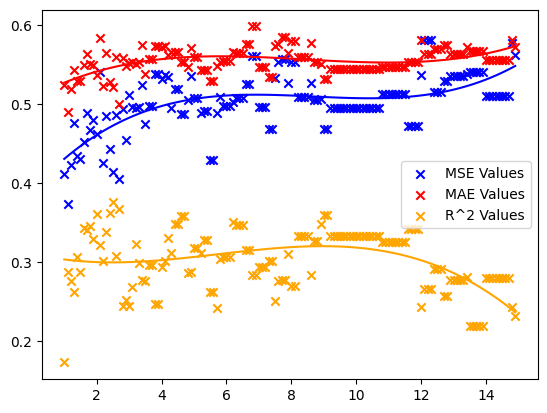

In [82]:
import numpy as np
import matplotlib.pyplot as plt

maeValues = [
            0.524150503696459, 0.489633766816119, 0.518911701329708, 0.542513367735157, 0.528600529889104, 0.529062954090948, 0.548515605563439, 0.562368377596734, 0.549700151331075, 0.548945122679055, 0.536109618132863, 0.582611027247426, 0.522892315880538, 0.564171827442956, 0.528083907542125, 0.520728538568393,
            0.559331602420704, 0.500125433059847, 0.55744211566065, 0.548062550851324, 0.551646019500682, 0.552516769640311, 0.550048483597795, 0.55333412122424, 0.574298453379974, 0.537803261470552, 0.556004018935538, 0.556004018935538, 0.573628972959989, 0.573628972959989, 0.571531839262969, 0.57333280516338,
            0.561967070791219, 0.565564503779835, 0.565996821470315, 0.565996821470315, 0.552225523307382, 0.552225523307382, 0.546709426123357, 0.570038870116688, 0.559228664029107, 0.559228664029107, 0.542121777214624, 0.542886601684819, 0.542886601684819, 0.52883277438753, 0.52883277438753, 0.547451616534304,
            0.553275919885374, 0.55466168706618, 0.55466168706618, 0.55466168706618, 0.565978264824766, 0.564291179695381, 0.564291179695381, 0.564291179695381, 0.575395848994326, 0.575395848994326, 0.597787916551283, 0.597787916551283, 0.545869735578612, 0.545869735578612, 0.545869735578612, 0.534214806905159,
            0.534214806905159, 0.573500185971709, 0.576213806634633, 0.583888541530576, 0.583888541530576, 0.56427886659331, 0.579399348014833, 0.579399348014833, 0.559526037634117, 0.559526037634117, 0.559526037634117, 0.559526037634117, 0.577266879742262, 0.552989918761829, 0.552989918761829, 0.550436182505199,
            0.531151171094368, 0.531151171094368, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673, 0.543847344585673,
            0.543847344585673, 0.543847344585673, 0.546586610382363, 0.546586610382363, 0.546586610382363, 0.546586610382363, 0.546586610382363, 0.546586610382363, 0.546586610382363, 0.546586610382363, 0.553440414914657, 0.553440414914657, 0.553440414914657, 0.553440414914657, 0.581213307553105, 0.562924214793546,
            0.562924214793546, 0.562924214793546, 0.568671981533758, 0.568671981533758, 0.568671981533758, 0.574479545296983, 0.574479545296983, 0.562333621151065, 0.562333621151065, 0.562333621151065, 0.562333621151065, 0.562333621151065, 0.571981945899205, 0.56705318592999, 0.56705318592999, 0.56705318592999,
            0.56705318592999, 0.56705318592999, 0.555369285047028, 0.555369285047028, 0.555369285047028, 0.555369285047028, 0.555369285047028, 0.555369285047028, 0.555369285047028, 0.555369285047028, 0.580250532606646, 0.571616998304226
            ]

mseValues = [
            0.41137291812213, 0.37252458703163, 0.422832662199773, 0.475922534082106, 0.43344716853946, 0.429803742508529, 0.45139601233721, 0.487774853566588, 0.466975872631439, 0.479908915844617, 0.46207722494521, 0.5404146359066, 0.424704543900385, 0.484836670006687, 0.443111504411245, 0.41335154212612,
            0.486225910904466, 0.404780758661673, 0.493181769505738, 0.45436003990284, 0.510866918308688, 0.495544328185175, 0.495228043347772, 0.495686767358729, 0.5233130822426, 0.474092304812014, 0.497019927253871, 0.497019927253871, 0.537334068998705, 0.537334068998705, 0.531486328377593, 0.536086680162506,
            0.533830564808525, 0.493992682001025, 0.518474470091756, 0.518474470091756, 0.487187615680335, 0.487187615680335, 0.504390321297637, 0.534583526191777, 0.507767713366949, 0.507767713366949, 0.487932860211316, 0.490982515890239, 0.490982515890239, 0.429210785203891, 0.429210785203891, 0.48827177115629,
            0.508844729714666, 0.497209796897211, 0.497209796897211, 0.497209796897211, 0.502626535008578, 0.507244355043965, 0.507244355043965, 0.507244355043965, 0.524555874995689, 0.524555874995689, 0.560387699845408, 0.560387699845408, 0.496317317784669, 0.496317317784669, 0.496317317784669, 0.467881733368297,
            0.467881733368297, 0.532148098160305, 0.552847402247199, 0.555998806427656, 0.555998806427656, 0.526751371557955, 0.553015259505667, 0.553015259505667, 0.508123898280162, 0.508123898280162, 0.508123898280162, 0.508123898280162, 0.52675854343626, 0.504435480499154, 0.504435480499154, 0.506369711156497,
            0.467684870759237, 0.467684870759237, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673, 0.494663010231673,
            0.494663010231673, 0.494663010231673, 0.51241950116992, 0.51241950116992, 0.51241950116992, 0.51241950116992, 0.51241950116992, 0.51241950116992, 0.51241950116992, 0.51241950116992, 0.471545352123161, 0.471545352123161, 0.471545352123161, 0.471545352123161, 0.536758218940164, 0.580186038790983,
            0.580186038790983, 0.580186038790983, 0.515069233182162, 0.515069233182162, 0.515069233182162, 0.528309809937177, 0.528309809937177, 0.535356681751138, 0.535356681751138, 0.535356681751138, 0.535356681751138, 0.535356681751138, 0.537946373493535, 0.539564536757469, 0.539564536757469, 0.539564536757469,
            0.539564536757469, 0.539564536757469, 0.509949109063696, 0.509949109063696, 0.509949109063696, 0.509949109063696, 0.509949109063696, 0.509949109063696, 0.509949109063696, 0.509949109063696, 0.576746163435011, 0.561486041592107
            ]

rSqauredValues = [
            0.172474243064331, 0.286986116766961, 0.275100201700508, 0.261219070082639, 0.306113089714964, 0.286913983260071, 0.342421045990775, 0.340665129378254, 0.344820050030403, 0.328516465717167, 0.360717966661289, 0.321531720880443, 0.300304038707461, 0.337998872993202, 0.361841652930054, 0.375228698866787,
            0.307290270392232, 0.367147143884927, 0.243975661260013, 0.252107502711714, 0.244054265878086, 0.267596117278222, 0.322041224683881, 0.298406407403633, 0.276515539396682, 0.275802118876792, 0.296475191585246, 0.296475191585246, 0.246361571159293, 0.246361571159293, 0.293296891072954, 0.301043269245308,
            0.330186676319883, 0.310442730243074, 0.347547285739785, 0.347547285739785, 0.357706385289492, 0.357706385289492, 0.285581873968446, 0.287537150107022, 0.316923336719711, 0.316923336719711, 0.311235552764871, 0.327337542394256, 0.327337542394256, 0.26165468877668, 0.26165468877668, 0.240809833974434,
            0.30385606506618, 0.306443064835034, 0.306443064835034, 0.306443064835034, 0.35044837898248, 0.347014088138702, 0.347014088138702, 0.347014088138702, 0.314369482909165, 0.314369482909165, 0.283290549063792, 0.283290549063792, 0.29323303695673, 0.29323303695673, 0.29323303695673, 0.300581455525876,
            0.300581455525876, 0.25005414912039, 0.27611788843646, 0.277146292020069, 0.277146292020069, 0.309254821521668, 0.269265995714055, 0.269265995714055, 0.332171161214552, 0.332171161214552, 0.332171161214552, 0.332171161214552, 0.283249502087392, 0.326870230631475, 0.326870230631475, 0.347801878141868,
            0.359436985271384, 0.359436985271384, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596, 0.332777541998596,
            0.332777541998596, 0.332777541998596, 0.32528541701469, 0.32528541701469, 0.32528541701469, 0.32528541701469, 0.32528541701469, 0.32528541701469, 0.32528541701469, 0.32528541701469, 0.340990077894418, 0.340990077894418, 0.340990077894418, 0.340990077894418, 0.242093745450799, 0.265678804910122,
            0.265678804910122, 0.265678804910122, 0.290175972793924, 0.290175972793924, 0.290175972793924, 0.256373219574212, 0.256373219574212, 0.276591907294662, 0.276591907294662, 0.276591907294662, 0.276591907294662, 0.276591907294662, 0.28040688045226, 0.218323887566102, 0.218323887566102, 0.218323887566102,
            0.218323887566102, 0.218323887566102, 0.279748596776056, 0.279748596776056, 0.279748596776056, 0.279748596776056, 0.279748596776056, 0.279748596776056, 0.279748596776056, 0.279748596776056, 0.242817074450117, 0.231560897747874
            ]

def plotLoBF(rangeCoeffsToCheck,data,color): 
    coefficients = np.polyfit(rangeCoeffsToCheck,data,3)
    polynomial = np.poly1d(coefficients)
    xfit = np.linspace(rangeCoeffsToCheck.min(),rangeCoeffsToCheck.max(),100)
    yfit = polynomial(xfit)

    plt.plot(xfit,yfit,color=color,alpha=1)

def plotData():
    rangeCoeffsToCheck = np.arange(1,15,0.1)
    plt.scatter(rangeCoeffsToCheck,mseValues,marker = 'x',color='blue',alpha = 1,label = 'MSE Values')
    plt.scatter(rangeCoeffsToCheck,maeValues,marker = 'x',color='red',alpha=1,label = 'MAE Values')
    plt.scatter(rangeCoeffsToCheck,rSqauredValues,marker = 'x',color='orange',alpha=1,label='R^2 Values')
    
    plotLoBF(rangeCoeffsToCheck,mseValues,'blue')
    plotLoBF(rangeCoeffsToCheck,maeValues,'red')
    plotLoBF(rangeCoeffsToCheck,rSqauredValues,'orange')

    plt.legend()
    plt.show()

plotData()

**Context**

*The above snippet uses data that I generated using a modified version of the linear regression algorithm combined with the pre-processing algorithm, then ran using a handler function so that i could repeatedly iterate over a list of `rangeCoeff` values and then get an associated `MAE`,`MSE` and `R Squared Score` for each range of acceptable data. This then provides me with enough data to be able to use numpy's buit-in `polyfit` function amongst others to generate a 3rd degree polynomial line of best fit representing the trend of each error value in relation to the range of acceptable data.*

*Each error metric's line of best fit is the same colour as that of the plotted points for the metric - ie line of best fit for MSE values is Blue because MSE values are plotted in blue.*

*This was mainly done to help illustrate the point of how all the error metrics can be somewhat manipulated in quite a simple way by just restricting the data so the regression line better fits the data. This was successfully shown on the graph as we can see that when a smaller range of data values are allowed then the lines begin to converge towards a single point with both `MSE` and `MAE` tending downards showing an averge decrease in the size of error and `R Squared` tends upwards as the model better explains variance within the dataset.*

### **Code Solution for Q1d**

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def main():
    min_max_scaler = preprocessing.MinMaxScaler()

    X = wineQualDf.drop(columns=['quality'])
    y = wineQualDf[['quality']]

    XScaled = min_max_scaler.fit_transform(X)

    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    mse_list = []
    mae_list = []
    r2_list = []

    for train_index, test_index in kf.split(XScaled):
        Xtrain, Xtest = XScaled[train_index], XScaled[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

        model = LinearRegression()
        model.fit(Xtrain, ytrain)
        
        yPred = model.predict(Xtest)

        mse = mean_squared_error(ytest, yPred)
        mae = mean_absolute_error(ytest, yPred)
        r2 = r2_score(ytest, yPred)
        
        mse_list.append(mse)
        mae_list.append(mae)
        r2_list.append(r2)

    avg_mse = np.mean(mse_list)
    avg_mae = np.mean(mae_list)
    avg_r2 = np.mean(r2_list)

    print(f'Average MSE: {round(avg_mse, 5)}')
    print(f'Average MAE: {round(avg_mae, 5)}')
    print(f'Average R-squared score: {round(avg_r2, 5)}')

    print("\nWeights (coefficients) for each feature from the last fold:")
    for feature, weight in zip(X.columns, model.coef_[0]):
        print(f"{feature}: {round(weight, 5)}")

    print(f"Bias (intercept) from the last fold: {round(model.intercept_[0], 5)}")

    return (avg_mae,avg_mse,avg_r2)

if __name__ == '__main__':
    LRPerformanceTuple = main()

Average MSE: 0.49083
Average MAE: 0.55243
Average R-squared score: 0.30501

Weights (coefficients) for each feature from the last fold:
fixed acidity: -0.1511
volatile acidity: -1.40907
citric acid: -0.27507
residual sugar: 0.05579
chlorides: -0.32061
free sulfur dioxide: 0.10579
total sulfur dioxide: -0.49569
density: -0.17547
pH: -1.15729
sulphates: 1.44319
alcohol: 1.4177
Bias (intercept) from the last fold: 6.51053


---

<div class="alert alert-success" style="text-align:left;"><h2>Question 2. Prediction Model 2<span style="float:right;">[20 marks]</span></h2></div>

#### Question 2a <span style="color:red">(10 marks)</span>

**TASK**: Build a different machine learning model for the same prediction task.
- Choose a model covered in the lectures or explain your choice of a different method. If you choose a different method, provide at at least two arguments to justify your choice compared to the ones covered in the lectures. 
- Specify which model you selected and why. 
- List the key parameters of your chosen model (Model 2).
- Provide a code implementation for the selected method.

<b>Q2a answer</b>:


## Model Choice
I chose to use a **Regressive Artificial Neural Network** for a couple of reasons as shown below:

**Non-Linear Relations**

As `Linear Regression` suggests in the name it aims to plot a linear line that can predict for a given a set of inputs `x` you'll get a certain output `y`, however this assumes that the data is linearly related. In the **Wine Quality Dataset** it is unlikely that the relationships between each of the input features are linearly related, in reality their relationships are likely more complex than this. Therefore a `ANN` may be more appropriate because conceptually it does still plot a regression line but the line that it generates can be in as many dimensions as needed rather than just 2 dimensions meaning that it can map out much more complex relationships - such as that which might be seen in the **Wine Quality Dataset**

**Feature Interactions**

In the **Wine Quality Dataset** certain features within the dataset may have an effect on other features within the input set, for example `Free Sulfur Dioxide`, `Total Sulphur Dioxide` and `Sulphates` are all inputs into the model however they also have a relationship within themseleves, this relationship might not get picked up by a simple model such as a Linear Regression model however an `ANN` is able to learn more complex relationships within the dataset provided and therefore might be able to more accurately predict `Wine Quality` as the network can now make use of relationships that weren't previously identified. 

To achieve the same ability to identify feature interactions and use them to help better generate accurate predictions in a `linear regression` algorithm the program would need extra **feature engineering** to be able to create datapoints that provided quantitative data representing the way that these input features interact with one-another which can introduce unneccesary complexity into the algorithm and can also produce logic errors if the way in the which the values for the relationship are not properly calculated which could therefore result in harm to the accuracy of the predictions produced by the model 

**Increased Model Complexity**

Similarly to **Non-Linear Relations** as `AAN`'s can be created with multiple hidden layers - a 'deep' network. Because both an `ANN` and `Linear Regression` algorithms generate a function to take the input values and then produce a single output value based on coefficients and raising the inputs to a certain degree (ie squaring an input), however a `Linear Regression` algorithm can only raise input paramaters to a maximum power of 1 therefore the function that is produced by the `Linear Regression` algorithm is a lot more generalised than that of an `ANN` which in some scenarios is beneficial however with a larger number of input parameters - such as that in the **Wine Quality Dataset** - this can lead to underfitting within the model which means that the model is *over-generalising* the data set, this is further worsened when looking at large datasets - like the **Wine Quality Dataset** - as the size of data means rather than trying to identify a single trend between 10 points - for example - where the model may be able to get more specific relationships the algorithm is attempting to find a pattern between >1000 datapoints so. This is another point where an `ANN` is more appropriate because when training you can limit the batch size - amount of datapoints the model is given each time it is trained - to either make the model find more sensitive trends - reduce batch size and therefore reduce underfitting - or make the model generalise more - increase the batch size and therefore find more widespread trends and reduce overfitting to the training data.

Being able to restrict the `batch size` and change the number of layers in an `ANN` will ultimately be beneficial for predicting `Wine Quality`because we can increase the number of hidden layers used in the `ANN` and then initially this will increase the chance of over fitting if we don't change the `batch size` as it can fit a function more specifically to the training data. Therefore we would then want to increase the `batch size` to try and make the model generalise to the dataset and therefore reduce the chance of overfitting. 

**Regressive**

I chose to use a **Regressive Artifical Neural Network** because the `quality` output is a decimcal value between 9 and 1 for the current dataset. Theoretically a **classification** network could have been used instead because there are rough limits to the predicted quality of the wine, **however** this would mean that there would need to be enough neurons in the output layer to be able to represent every possible `wine quality` output which may be more appropriate if there is a defined upper and lower bound to the value of the `quality` of wine and if there is a relatively small number of possible `wine qualities` - ie if wine quality was an integer between 1 and 9 - however because the `ANN` would need ~800 output neurons to be able to predict every value it is better to use a regressive network and then theoretically if an incredibly high quality wine was analysed it could be given a `quality` >9 whereas a **classification** network would be able to give it a rating of **9** at a maximum.

So **in conclusion** by using a **Regressive Artificiial Neural Network** it means that a single neuron can predict a `quality` of any value based on the input data, meaning the complexity of the algorithm is reduced and results in a simpler, more readable and elegant code solution.

**Past Experience**

Aside from a `Regressive Artificial Neural Network` being a good fit for a model to predict `wine quality` I also have past experience building similar `ANN`s for purposes such as analysing large amounts of stock data and replicating behaivour of 'slime mould' - to allow the A-level Biology department at my college to better replicate experiments in a controlled environment - amongst others. For this reason I felt confident in creating an `ANN` to be applied to the `Red Wine Quality dataset`.

Although this reason isn't as influential as some of the previous ones it still played a role in the decision making process which is why I decided to include it when laying out the reasoning behind choosing an `ANN` over other models.

## Key Parameters Within the Model
### Model

The `model` is the structure of the neural network that is used to when analysing data and subsequently making predictions based on new input data. In my program the model has a `Deep Structure` consisting of 5 (6 layers including drop out) of which 3 are hidden layers. Within each one of these layers in the code you need to specify the type of layer is it (`.Input`,`.Dense`,`.Dropout`) and then the dimension/number of neurons to be used in that layer of the network. Then if the layer is a `Dense` layer then the activation function also needs to be specified - for this I have used the `Rectified Linear Unit` activation function for the hidden layers. Next because the the output is `Regressive` - theoretically could also been `classification` but some accuracy would be lost without increasing the complexity of the algorithm because integer values need to be predicted (so could scale the score between 0 and 1000 for example) but a `regressive` approach is most likely going to be better suited to the application - the `output layer`'s activation function is then set to `Linear` so it just predicts a single value.

**Dropout() Layer**

A dropout layer aims to reduce overfitting by randomly turning off a percentage (in this case it's 10%) of the neurons in a specific layer. This reduces overfitting by reducing the chance that an `ANN` focusses too heavily on specific neurons within the specified layer and so by forcing the network to learn based off of redundant representations it means that the trained network will generalise better to unseen data and therefore help reduce overfitting. 

I applied a single `Dropout` layer to the model's widest layer because without this layer the model was underfitting to the data but then when the layer was introduced the model began overfitting more than it should so I introduced a `Dropout` layer with a `rate = 10` (drops 10% of neurons in the layer) which in turn helped prevent overfitting to the data.


### Callbacks

`Callbacks` are ran at the end of every `epoch` and are built-in functions from the keras package.

**Early Stopping**

`EarlyStopping` is used so that when a model's performance based on a given metric - in the case of the code below it's `val_mae` - starts to decrease so that the model doesn't overfit or starts to adjust its weight in a way that harm prediction accuracy. Within the function you can define certain parameters further to better fit your use case for example in my program I have adjusted the following variables:

- `patience`

    The patience value represents how many `epochs` in a row need to have no/very little improvement in reducing the `Mean Average Error for the Test Partition of the DataSet`. For my algorithm I set this to be **20** so that it didn't immediately stop the algorithm whenever a small plateau was found - for example if a local minimum was reached - however it also means that the program doesn't run unnecessarily long even though there is no improve (or even increase) in the `val_mae` for the algorithm.

- `min_delta`

    `min_delta` is the difference that the error metric being observed - `val_mae` - needs to decrease by to be actually registered as an improvement in the ability of the neural network to produce accurate predictions. So for my algorithm if the `val_mae` hasn't decreased by atleast the `min_delta` - *0.01* - amount then the program assumes that the model is as best trained as it's going to get and early stopping will stop the training of the network to make sure that it doesn't overfit.

- `restore_best_weights`

    `restore_best_weights` is an option will either a boolean `True` or `False` that only saves the `model`'s weights and biases for the network if it sees an improvement in the reduction of the specified error metric - `val_mae` in this case. This means that eventually if `EarlyStopping` stops training of the maximum number of epochs is reached then the weights that represent the version of the model with the lowest `val_mae` are the ones that are saved rather than just saving the most recent weights.

    This is useful for `EarlyStopping` because if the training is stopped due to the error metric not decreasing over the last `patience` number of epochs then we wouldn't want to save the most recent version of the model because even in the best case scenario there has been no real improvement in the accuracy in the model and most likely the `val_mae` has actually got worse over the period of the `patience` number of epochs. Therefore by using `restore_best_weights = True` then it means only the most accurate model is saved.

**Reduce Learning Rate**

`ReduceLROnPlateau` is a function that whenever the defined error metric - again `val_mae` in this case - doesn't reduce after `patience` (different value to the `patience` used for **Early Stopping**) number of epochs the learning rate of the algorithm is multipled by the value defined by `factor` - I am using a factor of `0.5` in my algorithm - to help try and find minimums within the loss value.

Being able to dynamically reduce `learning rate` is especially useful because it means to begin with a realtively high `learning rate` can be used - `0.01` - to force the algorithm to make bigger changes as a reaction to the predicted output and the expected output as a result this helps make sure that the neural network doesn't get stuck at a local minimum `mae_val` value - ([first run the cell directly below to produce a graph](#simple-model-of-an-anns-error-value)) if you think of the `val_mae` as the y-value on the graph and the x-value is the input to the function to calculate the loss. We can see that if the learning rate is too small the algorithm might find the point labelled `local minimum` and because its scope is so small that the only section of the graph it might 'explore' would be the trough that the `local minimum` is in and therefore it believes that this is the lowest it can get the value of the error metric. However we can see that in reality there is a much lower error value (labelled `global minimum`) so by having a higher `learning rate` initially the algorithm is going to over correct for errors but this in turn means its more likely to find the trough that the `global minimum` sits in. Then we begin to reduce the `learning rate` to slowly 'focus' in on finding the minimum of the trough the algorithm is currently in. If the learning rate wasn't reduced it would keep over-correcting for the error value and therefore the error value 'bounces' from one side of the trough to the other and never reaching the minmum of the error metric. Which is where `ReduceLROnPlateau` is used so when the error metric doesn't decrease by a certain amount over a given number of epochs (because it over correcting and 'bouncing' from side to side of the trough) the `learning rate` is multiplied by `factor` so smaller changes are made to eventually find the `global minimum`.

**In conclusion** `ReduceLROnPlateau` is needed because initally a **high** `learning rate` is needed so the model 'explores' the graph representing the error metric - `val_mae` - then to more accurately find the minimum the `learning rate` slowly shifts to become a **low** `learning rate` so smaller adjustments are made. **However** this is a very simple model of how and why 'learning rate' is adjusted as in reality `ANN`s operate in a much higher dimension that cannot be plotted on a simple graph.
    

### Simple Model of an ANN's Error Value

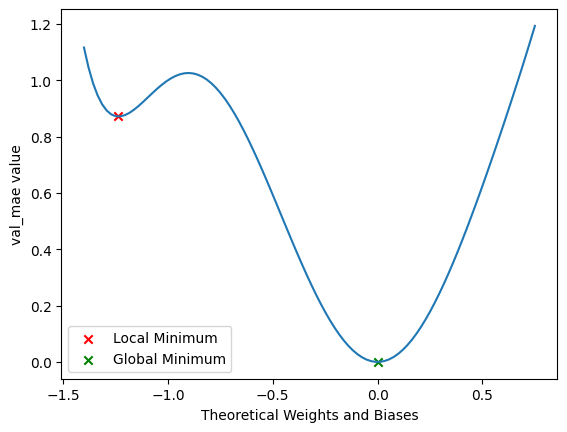

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):

    y = (x**6)+(0.5*(x**5))-(2.5*(x**4)) + (3*(x**2))
    return y 


def transform(inputs):
    output = []
    for x in inputs:
        output.append(f(x))

    return output


xVals = np.linspace(-1.4,0.75,100)
yVals = transform(xVals)
plt.plot(xVals,yVals)
plt.scatter([-1.23539],[0.87155],marker='x',label='Local Minimum',color='red')
plt.scatter([0],[0],marker = 'x',label='Global Minimum',color = 'green')

plt.xlabel('Theoretical Weights and Biases')
plt.ylabel('val_mae value')
plt.legend()
plt.show()

### 2a Code Solution

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from tensorflow import keras
from keras import Sequential, layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

def createModel():
    model = Sequential([
        layers.Input(shape=(11,)),
        
        layers.Dense(32, activation='relu'),
        
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        
        layers.Dropout(rate=0.1),
        
        layers.Dense(1, activation='linear')
    ])
    return model

def trainNeuralNetwork(trainingDataFrame):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
    scaler = StandardScaler()

    X = trainingDataFrame.drop(columns=['quality']).values
    y = trainingDataFrame['quality'].values

    mse_list = []
    mae_list = []
    r2_list = []

    for train_index, test_index in kf.split(X):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]

        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)

        model = createModel()
        optimiser = keras.optimizers.Adam(learning_rate=0.01)

        model.compile(
            optimizer=optimiser,
            loss='mse',
            metrics=['mae', 'mse']
        )

        earlyStopping = keras.callbacks.EarlyStopping(
            monitor='val_mae',
            patience=20,
            min_delta=0.01,
            restore_best_weights=True
        )

        reduceLearningRate = keras.callbacks.ReduceLROnPlateau(
            monitor='val_mae',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        )

        history = model.fit(
            Xtrain, ytrain,
            validation_data=(Xtest, ytest),
            batch_size=16,
            epochs=256,
            callbacks=[earlyStopping, reduceLearningRate],
            verbose=1
        )

        loss, mae, mse = model.evaluate(Xtest, ytest, verbose=0)
        yPred = model.predict(Xtest)
        r2 = r2_score(ytest, yPred)

        mse_list.append(mse)
        mae_list.append(mae)
        r2_list.append(r2)


    avg_mse = np.mean(mse_list)
    avg_mae = np.mean(mae_list)
    avg_r2 = np.mean(r2_list)

    print(f'Average MSE: {round(avg_mse, 5)}')
    print(f'Average MAE: {round(avg_mae, 5)}')
    print(f'Average R^2: {round(avg_r2, 5)}')

    #print(yPred)

    return avg_mae, avg_mse, avg_r2


if __name__ == '__main__':
    trainingDataFrame = pd.read_csv('winequality-red.csv')
    ANNPerformanceTuple = trainNeuralNetwork(trainingDataFrame)


Epoch 1/256
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.9946 - mae: 2.5398 - mse: 10.9946 - val_loss: 0.7594 - val_mae: 0.6891 - val_mse: 0.7594 - learning_rate: 0.0100
Epoch 2/256
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8724 - mae: 0.7513 - mse: 0.8724 - val_loss: 0.7823 - val_mae: 0.6982 - val_mse: 0.7823 - learning_rate: 0.0100
Epoch 3/256
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9569 - mae: 0.7699 - mse: 0.9569 - val_loss: 0.7863 - val_mae: 0.6999 - val_mse: 0.7863 - learning_rate: 0.0100
Epoch 4/256
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9161 - mae: 0.7542 - mse: 0.9161 - val_loss: 0.7325 - val_mae: 0.6810 - val_mse: 0.7325 - learning_rate: 0.0100
Epoch 5/256
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8866 - mae: 0.7534 - mse: 0.8866 - val_loss: 0.8530 - val_mae: 0.7286 - val_mse: 0.8530 - learning_rate: 0.0100
Epoch 6/256
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9992 - mae: 0.7950 - mse: 0.9992 - val_loss: 1.3553 - val_mae: 0.9271 - 

---

### Question 2b <span style="color:red">(10 marks)</span>
**TASK**: Evaluate the performance of your new model and compare it to Prediction Model 1.
- Analyze whether the new model performs better or worse and explain why.
    - Base your evaluation on the same metrics used in Question 1d).
- Include one plot visually comparing the performance of both models.
- Provide a brief textual explanation interpreting the results.

<b>Q2b answer</b>: 

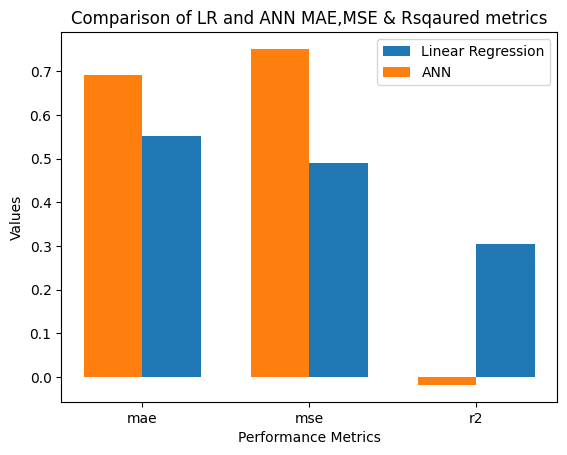

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def main():
    performanceMetrics = ['mae','mse','r2']

    x = np.arange(len(performanceMetrics))
    width = 0.35

    fig,ax = plt.subplots()
    bar1 = ax.bar(x+width/2,LRPerformanceTuple,width,label = 'Linear Regression')
    bar2 = ax.bar(x-width/2,ANNPerformanceTuple,width,label = 'ANN')

    ax.set_xlabel('Performance Metrics')
    ax.set_ylabel('Values')
    ax.set_title('Comparison of LR and ANN MAE,MSE & Rsqaured metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(performanceMetrics)

    ax.legend()
    plt.show()

if __name__ == '__main__':
    main()

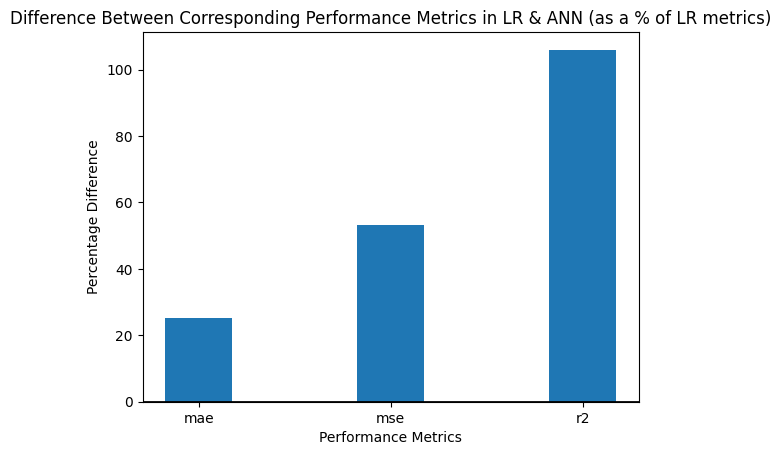

In [87]:
import matplotlib.pyplot as plt
import numpy as np

def getPctDifLRtoANN(LRPerformanceTuple,ANNPerformanceTuple):
    pctDifArr = []
    for LRpm,ANNpm in zip(LRPerformanceTuple,ANNPerformanceTuple):
        pctDif = ((ANNpm-LRpm)/LRpm)*100
        pctDifArr.append(abs(pctDif))

    return pctDifArr 

def main():
    performanceMetrics = ['mae','mse','r2']

    x = np.arange(len(performanceMetrics))

    fig,ax = plt.subplots()

    pctDifsArr = getPctDifLRtoANN(LRPerformanceTuple,ANNPerformanceTuple)

    ax.bar(x,pctDifsArr,0.35)
    ax.axhline(y=0,color='black',linewidth = 2)

    ax.set_xlabel('Performance Metrics')
    ax.set_ylabel('Percentage Difference')
    ax.set_title('Difference Between Corresponding Performance Metrics in LR & ANN (as a % of LR metrics)')
    ax.set_xticks(x)
    ax.set_xticklabels(performanceMetrics)

    plt.show()

if __name__ == '__main__':
    main()


### Performance Comparison Between a Regressive Artificial Neural Network and a Linear Regression Algorithm

**Overview**

The new **Artificial Neural Network** that I created performs significantly worse than the **Linear Regression** algorithm applied on the same data set, this could be for a few reasons.

1. **Lack of Data** 
The relatively small number of data points in the red wine dataset may contribute to the **Linear Regression** algorithm outperforming the **ANN** because the **ANN** needs a large amount of data to be able to correctly analyse and identify trends within the dataset so by having ~1000 datapoints the **ANN** may find it hard to accurately adjust its weights and biases to produce correct predictions given input data.

2. **Over-Generalisation**
As a consequence of the first reason (*Over Generalising*) the model typically predicts a single output value (the value that is most likely to be correct across all data points) rather than tailoring a value to each unique set of inputs. 

To try and counteract this I set the batch size to be realtively small - 16 - and set the model to have 4 hidden layers (5 with the dropout Layer) to try and make the algorithm more sensitive to the input data in a hope that this would stimulate it to develop unique predictions however due to the small size of data after pre-processing the model still predicted a constant single value.

This is further supported by looking at the performance metrics of the **ANN** because from the verbose produced when training we can see that the `MAE` and `MSE` generated from the training data are significantly higher than the same values generated from the test data partition, this suggests that the model is heavily underfitting which therefore supports the idea that the **ANN** is over generalising for the data set.

3. **K-Folds Cross Validation**

The way the **K-Folds Cross Validation** works is by creating unique subsets from the parent dataset - in this case it's the `wine quality dataset` however this means that the dataset is further reduced in size to facilitate the creation of the folds. For example after pre-processing the `red wine quality` dataset has ~1000 data points remaining, so if this is then split into 10 folds there is only ~100 data points left for the **ANN** to train on, so in only a couple of processes the **ANN** has gone from being trained on ~1500 datapoints to being trained on ~100.

The result of this is that the **ANN** can find it hard to identify meaningful patterns within the dataset no matter how complex the network is - this is why making the network deeper didn't help reduce over-generalisation in the same way it traditionally would. This means that in some specific cases - such as using the `red wine quality` dataset - although **K-Folds Cross Validation** may mean that we are provided with an average for the performance metrics of the **ANN** it has - at the same time - skewed all of the performance metrics and therefore the resultant output - although consistent every time the network is trained - is damaged compared to if the **ANN** had just been trained on the entire dataset at the same time because - especially with smaller datasets - the chances of getting a single batch that skews the error metrics of the model so much lower that it is singificantly noticeable are marginal, therefore somewhat making the **K-Folds Cross Validation** inaccurate and in some regards it could also be seen as slightly irrelevant if not harmful to the analysis of the model.

### Performance Metric Analysis (MAE,MSE,Rsqaured)

**Mean Average Error**

`Mean Average Error` (MAE) for the **ANN** is significantly higher than that of the **Linear Regression** algorithm. This can be seen on the second diagram where the difference between model 1 (**Linear Regression**) and model 2 (**ANN**) are plotted as a percentage of the corresponding performance metrics for the **Linear Regression** model onto a bar chart. From this we can see that the **ANN** has a **Mean Average Error** that is ~25% higher than that of the **Linear Regression** algorithm.

This means that the average size of the error for the **ANN** is higher than that for the **Linear Regression** algorithm therefore supporting the idea that the **ANN** is severly underperforming compared to the **Linear Regression** algorithm.

**Mean Sqaured Error**

Similarly to `MAE` the `Mean Squared Error` (MSE) for the **ANN** is singificantly higher than that of the **Linear Regression** algorithm which supports the idea that the **ANN** is over-generalising/underfitting to the training data because a higher **MSE** means that the **ANN** is making larger mistakes more frequently. This is seen on the first and second graph where - on the first graph - the `MSE` bar corresponding to the **ANN** is significantly higher at ~0.8 compared to the **Linear Regression** algorithm whose `MSE` is ~0.5. This represents a ~50% difference between the **ANN** and **Linear Regression** `MSE` - as a percentage of the **Linear Regression** `MSE`

**R Squared** (R2)
The `R2` value for the **ANN** is negative at ~-0.01, this indicates that the model is actually worse at predciting the data than if it just predicted the average value for the output column as its only output. On the other hand the `R2` value for the **Linear Regression** model is ~0.3 which represents a ~103% difference in the `R2` value between the **ANN** and the **Linear Regression** model. Although the `R2` value for the **Linear Regression** model is higher than that of the **ANN** an `R2` value of **0.3** still isn't considered especially high - a good model would want an `R2` value of >0.7.

The low `R2` value for both models indicates that neither are significantly better than just predicting the mean of the output column as the output from the model - in the case of the **ANN** this would actually improve performance - this is a strong indicator of underfitting in the **ANN** as the output has become so generalised it is worse than predicting the average for the `quality` column, this further links to earlier points suggesting that the neural network isn't being provided enough data to be able to properly train on the dataset.


---

<div class="alert alert-success" style="text-align:left;"><h2>Question 3. Comparison and Improvement<span style="float:right;">[30 marks]</span></h2></div>

#### Question 3a <span style="color:red">(15 marks)</span>
**TASK**: Analyze the impact of removing the least important feature from Prediction Model 1.
- Identify and remove the least important feature. 
- Retrain the Linear Regression model and evaluate its performance. 
- Compare the results before and after feature removal.
- Provide a code implementation and a justification explaining the impact on model performance.


<b>Q3a answer</b>:

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def main():
    min_max_scaler = preprocessing.MinMaxScaler()

    X = wineQualDf.drop(columns=['quality','residual sugar'])
    y = wineQualDf[['quality']]

    XScaled = min_max_scaler.fit_transform(X)

    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    mse_list = []
    mae_list = []
    r2_list = []

    for train_index, test_index in kf.split(XScaled):
        Xtrain, Xtest = XScaled[train_index], XScaled[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

        model = LinearRegression()
        model.fit(Xtrain, ytrain)
        
        yPred = model.predict(Xtest)

        mse = mean_squared_error(ytest, yPred)
        mae = mean_absolute_error(ytest, yPred)
        r2 = r2_score(ytest, yPred)
        
        mse_list.append(mse)
        mae_list.append(mae)
        r2_list.append(r2)

    avg_mse = np.mean(mse_list)
    avg_mae = np.mean(mae_list)
    avg_r2 = np.mean(r2_list)

    print(f'Average MSE: {round(avg_mse, 5)}')
    print(f'Average MAE: {round(avg_mae, 5)}')
    print(f'Average R-squared score: {round(avg_r2, 5)}')

    print("\nWeights (coefficients) for each feature from the last fold:")
    for feature, weight in zip(X.columns, model.coef_[0]):
        print(f"{feature}: {round(weight, 5)}")

    print(f"Bias (intercept) from the last fold: {round(model.intercept_[0], 5)}")

    return (avg_mae,avg_mse,avg_r2)

if __name__ == '__main__':
    LRPerformanceTuple2 = main()

Average MSE: 0.48946
Average MAE: 0.55189
Average R-squared score: 0.30696

Weights (coefficients) for each feature from the last fold:
fixed acidity: -0.18487
volatile acidity: -1.40835
citric acid: -0.27602
chlorides: -0.31468
free sulfur dioxide: 0.1082
total sulfur dioxide: -0.4935
density: -0.11339
pH: -1.18178
sulphates: 1.43458
alcohol: 1.44877
Bias (intercept) from the last fold: 6.50655


### Least Significant Feature

I identified the **Least Significant Feature** as being `residual sugar`, I came to this conclusion by looking at the weights produced by the initial **Linear Regression** model and then from the way in which the model works we can infer that the feature with the smallest absolute weight on the line will have the smallest effect removed. In the case of the **Red Wine Quality Dataset** this was the `residual sugar` feature that had an absolute weight of ~0.05 which is half of the second least significant feature - `free sulfur dioxide`.

So to retrain the model without this feature it was just a matter of adding in another column name into the `.drop()` 'columns' array to drop the `residual sugar` column along with the `quality` column in the input dataset.

### Results Comparison

As can be seen in the **bar chart** below the consequences of removing the `residual sugar` column from the dataset are minimal where only very small marginal differences are seen between the `MAE`,`MSE` and `R2` metrics for both models.

**Mean Average Error** (MAE)

The `MAE` for both models are approximately equal which shows that `residual sugar` had very little impact on the output prediction produced by the **Linear Regression** model as the average error hasn't changed. If `quality` had a greater dependency on `residual sugar` then we would see that there would be a noticeable difference as the model tries to counteract for the loss of an important feature/

**Mean Sqaured Error** (MSE)

Similarly to `MAE` the `MSE` for the **Linear Regression** models with and without the `residual sugar` input feature are approximately equal. The difference in `MSE` is slightly larger than that of `MAE` but this is due to the fact that the same size error will have a greater pinalisation on the model when using `MSE` as the metric because all errors are squared which places emphasis on reducing larger errors but will also appear to increase the size of smaller errors - which is why we can see more of a difference between the 2 values of the 2 different **Linear Regression** models.

**Rsquared** (R2)

Inline with the other 2 peformance metrics `R2` sees very little change after the removal of the residual sugar, this is what should be expected due to the `residual sugar` having a very small weight on the **Linear Regression** model's predicted output with a weight of ~0.05. This also implies that the output - 'quality' - has very little dependence on the `residual sugar` column because `R2` is used to explain the variance in the data output, if the `R2` decreased significantly then this would imply that `residual sugar` plays a large part in explaining the spread/variance in the output of the data however as `R2` only marginally changed it would imply that `residual sugar` had very little influence over the output.

So the fact that the `R2` value only changed very slightly further supports the idea that `residual sugar` is the least siginifcant feature in the input data of the **Red Wine Dataset**.

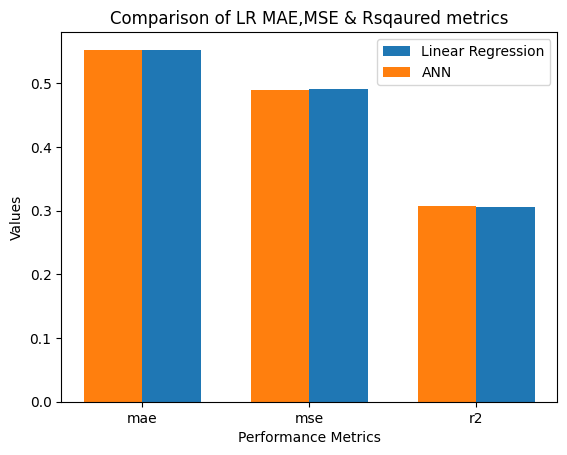

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def main():
    performanceMetrics = ['mae','mse','r2']

    x = np.arange(len(performanceMetrics))
    width = 0.35

    fig,ax = plt.subplots()
    bar1 = ax.bar(x+width/2,LRPerformanceTuple,width,label = 'Linear Regression')
    bar2 = ax.bar(x-width/2,LRPerformanceTuple2,width,label = 'ANN')

    ax.set_xlabel('Performance Metrics')
    ax.set_ylabel('Values')
    ax.set_title('Comparison of LR MAE,MSE & Rsqaured metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(performanceMetrics)

    ax.legend()
    plt.show()

if __name__ == '__main__':
    main()

---

#### Question 3b <span style="color:red">(15 marks)</span>
**TASK**: Based on your observations, suggest strategies for improving future models when predicting on new data.
- Discuss potential improvements. 

<b>Hint</b>: based on relevant analysis, feature selection, feature scaling and data processing (e.g. resolve imbalanced samples, errors and outliers, etc.) could all potentially improve the model by reducing training time, fixing overfitting and improving interpretability, etc. 
You can also explore external resources for other potential approaches or techniques.<br>

<b>Note</b>: Coding is optional here, but your answers should be supported by relevant analysis or justifications.

<b>Q3b answer</b>:

**Removing K-Folds Cross Validation**

When an **Artificial Neural Network** (ANN) is trained without using **K-Folds Cross Validation** we can see below on the bar chart showing the difference between using **K-Folds Cross Validation** in the **ANN** and not using it. The chart shows that when the **K-Folds Cross Validation** is removed with very few tweaks the **ANN** can significantly improve as shown by the change in the performance metrics:
- `MAE` improves ~25%
- `MSE` improves ~50%
- `R2` improves ~100%

After making this adjustment the **ANN** is much closer to the performance of the **Linear Regression** model that was trained on the **Red Wine Dataset** earlier. This can also be seen on the second **bar chart** below which shows the difference between the performance metrics for the **new ANN** and the **Linear Regression** model as a percentage of the performance values of the **Linear Regression** model. We can see the that the performance metrics have the following differences:
- `MAE` - **Linear Regression** is ~4% higher
- `MSE` - **Linear Regression** is ~6% higher
- `R2` - **Linear Regression** is ~3% higher

So although linear regression is still higher, now it is very marginally higher whereas before there was a large disparity between the **ANN** and the **Linear Regression** model. This is because now the **ANN** is trained on batches made from all ~1000 data points at once rather than being trained independently multiple times but on a lot smaller amount of data each size, this gives the **ANN** more opportunity to analyse and identify trends within the data which is why we see more accurate outputs after removing the **K-Folds Cross Validation**.

**However**, some of the improvements in the model's performance metrics may have come from having to also slightly alter some of the **hyperparameters** for the model which could improve performance in some models. In addition although removing **K-Folds Cross Validation** improved the performance metrics of the **ANN** it also increases the chance of the model overfitting - which in this scenario is what we were looking to make happen - which alternatively could result in harming the performance metrics rather than helping them.

**Feature Engineering - Polynomial Feature Generation**

One method that may be able to help the **Linear Regression** model more accurately predict `quality` is by generating more complex features then passing then providing the algorithm with them as inputs. This could allow us to use **Linear Regression** to map more complex relationships because a feature could be created that represents a non-linear relationship between 2 input features - so a normal **Linear Regression** algorithm wouldn't pick up on the relationship - which will allow somewhat allow the model to learn off of non-linear relationships although the model itself is inherently linear.

For example a feature could be created by multiplying `volatile_acidity` with `sulphates` to capture a non-linear relationship between the 2 features that a **Linear Model** would otherwise miss.

**Feature Engineering - Removing Redundant Features**

Another method that my help reduce **overfitting** is to remove redundant or irrelevant features from within the dataset. This was already explored early in the notebook however that was based off of the idea of removing a feature based on how little its input contributed to the overall output of the code.

Another method to identify **multicollinearity** is by performing a correlation analysis on the data set (*shown on the 3rd graph below*) to try and identify features that are highly correlated with one another (*absolute correlation value >=0.7*), this would be beneficial to a **Linear Regression** model because when they assign a weight to each attribute if 2 attributes have the same effect it can be hard to identify which one to change and by how much which results in unstable coefficients.

**However** although performing this sort of feature engineering will help improve a **Linear Regression** model's ability to predict outputs for a given set of inputs it may be **more beneficial** leaving the colinear features in the dataset when using an **ANN** because they might be able to identify a non-linear realtionship between the 2 features which would improve the accuracy of the model's predictions. 


### No K-Folds Cross Validation

Epoch 1/128
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 25.3023 - mae: 4.6235 - mse: 25.3023 - val_loss: 5.7887 - val_mae: 1.7290 - val_mse: 5.7887 - learning_rate: 0.0100
Epoch 2/128
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2823 - mae: 1.6691 - mse: 4.2823 - val_loss: 3.2056 - val_mae: 1.4706 - val_mse: 3.2056 - learning_rate: 0.0100
Epoch 3/128
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1143 - mae: 1.4295 - mse: 3.1143 - val_loss: 2.0133 - val_mae: 1.0989 - val_mse: 2.0133 - learning_rate: 0.0100
Epoch 4/128
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1564 - mae: 1.1485 - mse: 2.1564 - val_loss: 1.6021 - val_mae: 0.9993 - val_mse: 1.6021 - learning_rate: 0.0100
Epoch 5/128
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7136 - mae: 1.0473 - mse: 1.7136 - val_loss: 1.2989 - val_mae: 0.8908 - val_mse: 1.2989 - learning_rate: 0.0100
Epoch 6/128
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2945 - mae: 0.9099 - mse: 1.2945 - val_loss: 1.0030 - val_mae: 0.7885 - val_ms

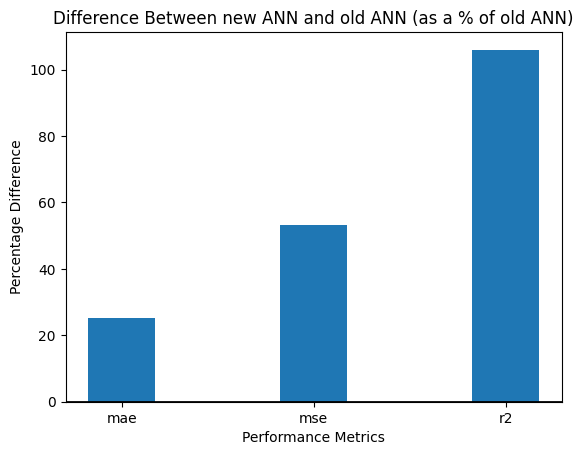

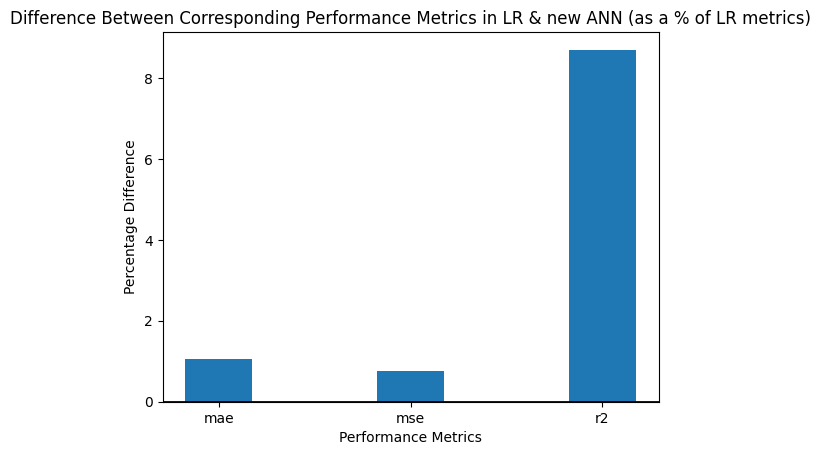

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import Sequential,layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


def getPctDifANNtoANN(newANNPerformanceTuple,ANNPerformanceTuple):
    pctDifArr = []
    for nANNpm,ANNpm in zip(newANNPerformanceTuple,ANNPerformanceTuple):
        pctDif = ((nANNpm-ANNpm)/ANNpm)*100
        pctDifArr.append(abs(pctDif))

    return pctDifArr 

def compareToOriginalANN(newANNPerformanceTuple):
    pctDifArr = getPctDifANNtoANN(newANNPerformanceTuple,ANNPerformanceTuple)
    pctDifsArr = getPctDifLRtoANN(LRPerformanceTuple,ANNPerformanceTuple)
    performanceMetrics = ['mae','mse','r2']


    x = np.arange(len(newANNPerformanceTuple))

    fig,ax = plt.subplots()

    ax.bar(x,pctDifsArr,0.35)
    ax.axhline(y=0,color='black',linewidth = 2)

    ax.set_xlabel('Performance Metrics')
    ax.set_ylabel('Percentage Difference')
    ax.set_title('Difference Between new ANN and old ANN (as a % of old ANN)')
    ax.set_xticks(x)
    ax.set_xticklabels(performanceMetrics)

    plt.show()

def getPctDifLRtoANN(LRPerformanceTuple,ANNPerformanceTuple):
    pctDifArr = []
    for LRpm,ANNpm in zip(LRPerformanceTuple,ANNPerformanceTuple):
        pctDif = ((ANNpm-LRpm)/LRpm)*100
        pctDifArr.append(abs(pctDif))

    return pctDifArr 

def compareLRtonANN(nANNPerformanceTuple):
    performanceMetrics = ['mae','mse','r2']

    x = np.arange(len(performanceMetrics))

    fig,ax = plt.subplots()

    pctDifsArr = getPctDifLRtoANN(LRPerformanceTuple,nANNPerformanceTuple)

    ax.bar(x,pctDifsArr,0.35)
    ax.axhline(y=0,color='black',linewidth = 2)

    ax.set_xlabel('Performance Metrics')
    ax.set_ylabel('Percentage Difference')
    ax.set_title('Difference Between Corresponding Performance Metrics in LR & new ANN (as a % of LR metrics)')
    ax.set_xticks(x)
    ax.set_xticklabels(performanceMetrics)

    plt.show()

def createModel():
    model = Sequential([
        layers.Input(shape=(11,)),
        layers.Dense(32,activation='relu'),

        layers.Dense(64,activation='relu'),
        layers.Dropout(rate=0.2),

        layers.Dense(32,activation='relu'),

        layers.Dense(1,activation='linear')
    ])

    return model

def trainNeuralNetwork(trainingDataFrame):
    model = createModel()
    optimiser = keras.optimizers.Adam(learning_rate=0.01)
    scaler = StandardScaler()

    model.compile(
        optimizer=optimiser,
        loss='mse',
        metrics=['mae','mse']
    )

    earlyStopping = keras.callbacks.EarlyStopping(
        monitor='val_mae',
        patience = 20,
        min_delta = 0.01,
        restore_best_weights = True
    )

    reduceLearningRate = keras.callbacks.ReduceLROnPlateau(
        monitor = 'val_mae',
        factor=0.5,
        patience = 5,
        min_lr = 1e-6
    )

    checkPointCallback = keras.callbacks.ModelCheckpoint(
        'model_checkpoint.keras',
        save_best_only = True,
        monitor = 'val_mae',
        mode = 'min',
    )

    trainingDataFrame = trainingDataFrame.dropna()
    X = trainingDataFrame.drop(columns=['quality']).values
    y = trainingDataFrame['quality'].values

    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

    Xtrain = scaler.fit_transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    history = model.fit(
        Xtrain,ytrain,
        validation_data=(Xtest,ytest),
        batch_size=128,
        epochs = 128,
        callbacks=[earlyStopping,reduceLearningRate,checkPointCallback],
    )

    loss,mae,mse = model.evaluate(Xtest,ytest,verbose=0)

    Ypred = model.predict(Xtest)
    r2Score = r2_score(ytest,Ypred)
    print(f'MAE:\t\t{mae}')
    print(f'MSE:\t\t{mse}')
    print(f'R2 Score:\t{r2Score}')

    compareToOriginalANN((mae,mse,r2Score))
    compareLRtonANN((mae,mse,r2Score))

if __name__ == '__main__':
    trainingDataFrame = pd.read_csv('winequality-red.csv')
    trainNeuralNetwork(trainingDataFrame)


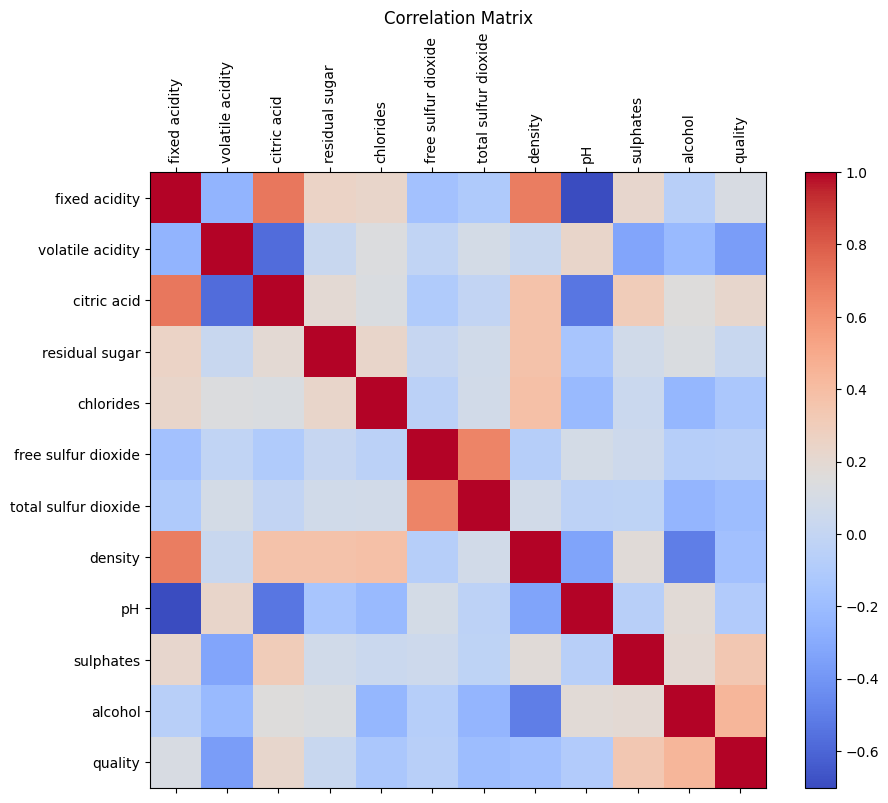

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

correlation_matrix = wineQualDf.corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(cax)
plt.title('Correlation Matrix')
plt.show()


---

## Appendix. Coursework Instructions

<b>Coursework Support</b>:
- COMP1008 computing tutorials and exercises on data processing and machine learning models on different example problems
- Example code building and analysing machine learning models in COMP1008 lectures slides on 'Machine learning'
- In the computing sessions, Q&A support for developing .ipynb projects
- In Teams channel 'COMP1008 2024/25 / Questions': support of common questions

<b>Marks</b>: in total 100 marks (count for 25% in COMP1008), awarded on the basis of:
- knowledge and understanding on the theories covered in lectures when answering the questions in the Jupyter Notebook report
- how informative and well presented your code, visualisations and results are (e.g. necessary labels in plots)
- self-learning ability making use of tutorial materials and online resources
- problem solving skills to obtain the answers and results for the specific dataset
- concise report with key details, e.g. parameters, data, etc. for others to repeat your methods and obtain the same results.

For more information of COMP1008 assessment please refer to the coursework issue in Moodle ('Course Content / Assessment').

<b>Format</b>:
- One single .ipynb file named 202425_COMP1008_cw_XXX.ipynb, where XXX is your username (e.g. psxyz)
- The .ipynb file should include your code and answers, using this given .ipynb template (please add cells as needed)
- You could use additional Python libraries as you wish, in addition to the ones demonstrated in the computing sessions
- There are multiple ways using different methods to complete the tasks. These are fine as long as all answers and analysis are supported by the code implemented in Jupyter Notebook, not by using other means (e.g. operations in Excel, or by using other languages, etc.).

<b>Submission</b>: 
- Deadline: <b><font color = "red">24 March, 3pm</font></b>.
- Late submission leads to a 5% deduction of the coursework on each weekday. Work submitted one week late will receive a 0 for the coursework.
- Method: in Moodle submit a single .ipynb file named 202425_COMP1008_cw_XXX.ipynb
- If you can’t submit your coursework on time due to ECs, please contact Student Services and your personal tutor ASAP

<b>Note: Plagiarism vs. Group Discussions</b> 

As you should know, plagiarism is completely unacceptable and will be dealt with according to University's standard policies.<br>
Students are encouraged to have only general discussions on the theory (not the specific questions) when completing the coursework.<br>
It is important that when you actually do your coursework and write the answers, you do it individually.<br>
Do NOT, under any circumstances, share your report, code or figures, etc. with anyone else.